In [21]:
import warnings # suppress warnings
warnings.filterwarnings('ignore')

In [22]:
import os
import gc
import glob
import random

import numpy as np 
import pandas as pd
import seaborn as sns

from tqdm import tqdm
from scipy import stats
from pathlib import Path

import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
%matplotlib inline

for dirname, _, filenames in os.walk('C:\\Users\\2216027\\kaggle3'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\2216027\kaggle3\input\sample_submission.csv
C:\Users\2216027\kaggle3\input\submission_files.zip
C:\Users\2216027\kaggle3\input\train_labels.csv
C:\Users\2216027\kaggle3\input\submission_files\0.6222863195.csv
C:\Users\2216027\kaggle3\input\submission_files\0.6223807245.csv
C:\Users\2216027\kaggle3\input\submission_files\0.6225426578.csv
C:\Users\2216027\kaggle3\input\submission_files\0.6247722291.csv
C:\Users\2216027\kaggle3\input\submission_files\0.6253455681.csv
C:\Users\2216027\kaggle3\input\submission_files\0.6254850917.csv
C:\Users\2216027\kaggle3\input\submission_files\0.6255093621.csv
C:\Users\2216027\kaggle3\input\submission_files\0.6260141578.csv
C:\Users\2216027\kaggle3\input\submission_files\0.6263493693.csv
C:\Users\2216027\kaggle3\input\submission_files\0.6272779211.csv
C:\Users\2216027\kaggle3\input\submission_files\0.6272932068.csv
C:\Users\2216027\kaggle3\input\submission_files\0.6278191266.csv
C:\Users\2216027\kaggle3\input\submission_files\0.6286579774.csv
C:

In [23]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss

In [17]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.
  Using cached lightgbm-3.3.5-py3-none-win_amd64.whl (1.0 MB)



In [24]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm.callback import early_stopping, log_evaluation

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

Data import

(0    10000
 1    10000
 Name: label, dtype: int64,
 0    0.5
 1    0.5
 Name: label, dtype: float64)

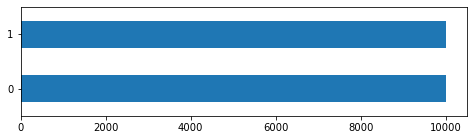

In [25]:
labels = pd.read_csv('C:\\Users\\2216027\\kaggle3\\input\\train_labels.csv', index_col='id')
y = labels['label']

y.value_counts().plot(kind='barh', figsize=(8,2))
y.value_counts(), y.value_counts(normalize=True) 

In [31]:
path_files = 'C:\\Users\\2216027\\kaggle3\\input\\submission_files/*.csv'

path_list  = sorted(glob.glob(path_files), reverse=True)
len(path_list), path_list[0], '...', path_list[-1]

(5000,
 'C:\\Users\\2216027\\kaggle3\\input\\submission_files\\0.7575039918.csv',
 '...',
 'C:\\Users\\2216027\\kaggle3\\input\\submission_files\\0.6222863195.csv')

In [33]:
sub0  = pd.read_csv(path_list[0])
loss0 = log_loss(y, sub0['pred'][:20000])
loss0

0.7575039918285069

Share Coefficient: 25%

In [34]:
n_iteration = 10 # The number of iteration
golden_list = [0] * 5000 

for i in range(n_iteration):
    print('------------------------------')
    print('The number of iteration:', i, '\n')    
    n_sub = random.randrange(500)
    
    sub = pd.read_csv(path_list[n_sub])
    loss = log_loss(y, sub['pred'][:20000])
    print(loss, ' >>> ', n_sub, ' Initial value')
    
    for n in range(n_sub,5000):
        subn = pd.read_csv(path_list[n])    
        subn['pred'] = (sub['pred'] * 0.75) + (subn['pred'] * 0.25)
        lossn = log_loss(y, subn['pred'][:20000])
    
        if (loss > lossn):
            loss = lossn
            sub  = subn 
            print(loss, ' >>> ', n)            
            golden_list[n] += 1
        gc.collect()          
print('------------------------------')

------------------------------
The number of iteration: 0 

0.7410203216423732  >>>  202  Initial value
0.7230169762245497  >>>  203
0.7208724114353082  >>>  204
0.6615919237023329  >>>  206
0.6607330942576014  >>>  235
0.659823305206524  >>>  269
0.6566679770662152  >>>  272
0.654804636172522  >>>  307
0.6530877033947701  >>>  378
0.6470686005148273  >>>  446
0.6287166165399927  >>>  591
0.6253771063898043  >>>  630
0.610032749279455  >>>  1455
0.6096225822055147  >>>  1809
0.5992452887718474  >>>  2585
0.5990210800057605  >>>  2591
0.5963516333415678  >>>  3228
0.5908135139959  >>>  3244
0.5858083708837898  >>>  3781
0.5851922225884753  >>>  3784
0.5800971789277283  >>>  3873
0.5798231273121802  >>>  3950
0.5768659520089418  >>>  4391
0.5742176929128338  >>>  4428
0.573856185683573  >>>  4976
0.5728579170336489  >>>  4977
------------------------------
The number of iteration: 1 

0.747053096666513  >>>  83  Initial value
0.73804908911802  >>>  84
0.733205908333833  >>>  85
0.7300424

In [35]:
golden_df = pd.DataFrame(golden_list)

print(golden_df.value_counts())
print(golden_df.value_counts(normalize=True))

0     4885
1       70
2       16
10       7
7        5
3        4
4        4
5        4
8        2
9        2
6        1
dtype: int64
0     0.9770
1     0.0140
2     0.0032
10    0.0014
7     0.0010
3     0.0008
4     0.0008
5     0.0008
8     0.0004
9     0.0004
6     0.0002
dtype: float64


That is, more than 0.975 results (4877 cases) were never good in "Ensembling".
But on the other hand, 0.0014 results (7 cases) have been effective in every ten "Ensembling".

<AxesSubplot:ylabel='0'>

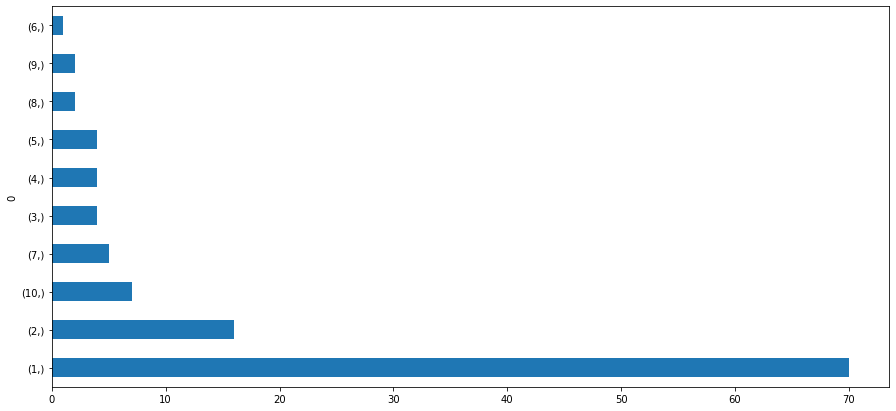

In [36]:
g_list = np.array([ele for ele in golden_list if (ele != 0)])

g_df = pd.DataFrame(g_list)
g_df.value_counts().plot(kind='barh', figsize=(15,7))

In [37]:
golden = []
for k in range (len(golden_list)):
    if (golden_list[k] != 0):
        golden.append([k, golden_list[k]])
        
pd.DataFrame(golden)

,0,1
0,17,1
1,18,1
2,20,1
3,22,1
4,23,2
...,...,...
110,4949,1
111,4950,1
112,4971,3
113,4976,7


In [39]:
np.save('golden25.npy', golden) 
!dir

 Volume in drive C has no label.
 Volume Serial Number is 2070-C46E

 Directory of C:\Users\2216027

28-03-2023  13:44    <DIR>          .
28-03-2023  13:44    <DIR>          ..
10-08-2022  10:20    <DIR>          .cisco
21-02-2023  10:38    <DIR>          .conda
28-11-2022  12:09                25 .condarc
25-11-2022  17:42    <DIR>          .continuum
27-03-2023  12:30    <DIR>          .ipynb_checkpoints
28-11-2022  13:15    <DIR>          .ipython
21-02-2023  14:20    <DIR>          .jupyter
01-12-2022  10:16    <DIR>          .matplotlib
24-09-2022  11:01    <DIR>          .ms-ad
01-03-2023  09:52    <DIR>          .spyder-py3
01-03-2023  16:52    <DIR>          .ssh
23-02-2023  12:27    <DIR>          .vscode
13-03-2023  12:24           870,904 20BCE1778_K_means_clustering.csv
09-08-2022  18:09    <DIR>          3D Objects
06-12-2022  12:45             4,213 Advertising.csv
13-12-2022  09:53           980,218 Ames_outliers_removed.csv
28-02-2023  10:35             3,141 chunks.ip

Share Coefficient: 15%

In [40]:
n_iteration = 10 # The number of iteration
golden_list = [0] * 5000 

for i in range(n_iteration):
    print('------------------------------')
    print('The number of iteration:', i, '\n')    
    n_sub = random.randrange(500)
    
    sub = pd.read_csv(path_list[n_sub])
    loss = log_loss(y, sub['pred'][:20000])
    print(loss, ' >>> ', n_sub, ' Initial value')
    
    for n in range(n_sub,5000):
        subn = pd.read_csv(path_list[n])    
        subn['pred'] = (sub['pred'] * 0.85) + (subn['pred'] * 0.15)
        lossn = log_loss(y, subn['pred'][:20000])
    
        if (loss > lossn):
            loss = lossn
            sub  = subn 
            print(loss, ' >>> ', n)            
            golden_list[n] += 1
        gc.collect()          
print('------------------------------')

------------------------------
The number of iteration: 0 

0.7461391989858003  >>>  95  Initial value
0.7363866798029023  >>>  96
0.7351063007365521  >>>  97
0.7316400311500086  >>>  98
0.7287462859140366  >>>  99
0.7239454046638406  >>>  100
0.722525037056029  >>>  104
0.7192846468161017  >>>  105
0.7167009494059928  >>>  109
0.706383681868735  >>>  117
0.7011743710505243  >>>  121
0.6985037334679217  >>>  124
0.6982042491249509  >>>  137
0.6965337780615759  >>>  149
0.6784232377586821  >>>  158
0.655025301668843  >>>  206
0.6548498843073483  >>>  235
0.6539422836360849  >>>  269
0.6526049101606158  >>>  272
0.6507458592354685  >>>  307
0.6494894715643075  >>>  378
0.6465481224091091  >>>  446
0.631620645060617  >>>  591
0.6309359190732355  >>>  630
0.6157198703427063  >>>  1455
0.6095339714454832  >>>  1634
0.6090946447682747  >>>  1650
0.6007930079958572  >>>  2585
0.599275253494687  >>>  2597
0.5963808326276676  >>>  3228
0.5925106446675356  >>>  3244
0.5892072358213065  >>>  3781

In [41]:
golden_df = pd.DataFrame(golden_list)

print(golden_df.value_counts())
print(golden_df.value_counts(normalize=True))

0     4835
1       97
2       27
10      16
4        6
5        6
3        4
7        4
6        3
8        1
9        1
dtype: int64
0     0.9670
1     0.0194
2     0.0054
10    0.0032
4     0.0012
5     0.0012
3     0.0008
7     0.0008
6     0.0006
8     0.0002
9     0.0002
dtype: float64


That is, more than 0.97 results (4853 cases) were never good in "Ensembling".
But on the other hand, 0.003 results (15 cases) have been effective in every ten "Ensembling"

<AxesSubplot:ylabel='0'>

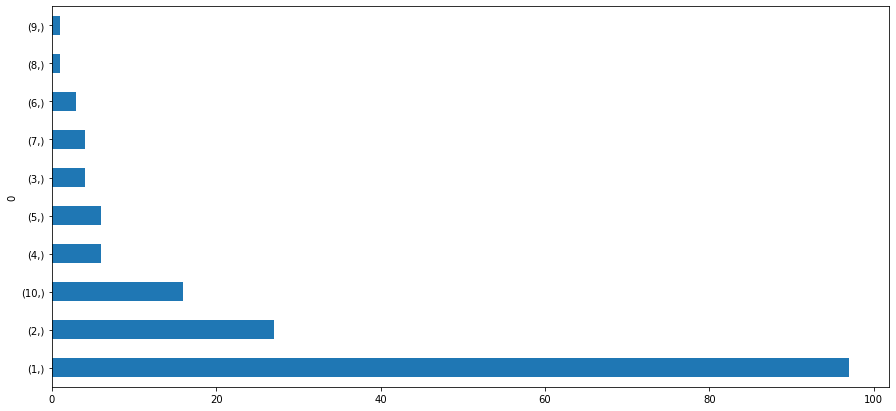

In [42]:
g_list = np.array([ele for ele in golden_list if (ele != 0)])

g_df = pd.DataFrame(g_list)
g_df.value_counts().plot(kind='barh', figsize=(15,7))

In [43]:
golden = []
for k in range (len(golden_list)):
    if (golden_list[k] != 0):
        golden.append([k, golden_list[k]])
        
pd.DataFrame(golden)

,0,1
0,30,1
1,31,2
2,32,2
3,33,2
4,34,1
...,...,...
160,4910,10
161,4949,10
162,4950,10
163,4971,10


In [45]:
np.save('golden15.npy', golden) 
!dir

 Volume in drive C has no label.
 Volume Serial Number is 2070-C46E

 Directory of C:\Users\2216027

28-03-2023  16:07    <DIR>          .
28-03-2023  16:07    <DIR>          ..
10-08-2022  10:20    <DIR>          .cisco
21-02-2023  10:38    <DIR>          .conda
28-11-2022  12:09                25 .condarc
25-11-2022  17:42    <DIR>          .continuum
28-03-2023  16:05    <DIR>          .ipynb_checkpoints
28-11-2022  13:15    <DIR>          .ipython
21-02-2023  14:20    <DIR>          .jupyter
01-12-2022  10:16    <DIR>          .matplotlib
24-09-2022  11:01    <DIR>          .ms-ad
01-03-2023  09:52    <DIR>          .spyder-py3
01-03-2023  16:52    <DIR>          .ssh
23-02-2023  12:27    <DIR>          .vscode
13-03-2023  12:24           870,904 20BCE1778_K_means_clustering.csv
09-08-2022  18:09    <DIR>          3D Objects
06-12-2022  12:45             4,213 Advertising.csv
13-12-2022  09:53           980,218 Ames_outliers_removed.csv
28-02-2023  10:35             3,141 chunks.ip

Share Coefficient: 5%

In [46]:
n_iteration = 10 # The number of iteration
golden_list = [0] * 5000 

for i in range(n_iteration):
    print('------------------------------')
    print('The number of iteration:', i, '\n')    
    n_sub = random.randrange(500)
    
    sub = pd.read_csv(path_list[n_sub])
    loss = log_loss(y, sub['pred'][:20000])
    print(loss, ' >>> ', n_sub, ' Initial value')
    
    for n in range(n_sub,5000):
        subn = pd.read_csv(path_list[n])    
        subn['pred'] = (sub['pred'] * 0.95) + (subn['pred'] * 0.05)
        lossn = log_loss(y, subn['pred'][:20000])
    
        if (loss > lossn):
            loss = lossn
            sub  = subn 
            print(loss, ' >>> ', n)            
            golden_list[n] += 1
        gc.collect()          
print('------------------------------')

------------------------------
The number of iteration: 0 

0.7425650165504283  >>>  162  Initial value
0.7425650165504282  >>>  162
0.7418810576309647  >>>  163
0.7384286792595921  >>>  164
0.7372438929962365  >>>  165
0.7351136073376591  >>>  166
0.7330673504864388  >>>  167
0.7325089969236129  >>>  168
0.7315639746590438  >>>  169
0.7302922699415322  >>>  170
0.7300407505957841  >>>  171
0.7287519203077081  >>>  172
0.7280209753748459  >>>  173
0.7261961030699796  >>>  175
0.7256222719403088  >>>  176
0.7248380030297249  >>>  179
0.7223109781970698  >>>  180
0.7210291675082208  >>>  181
0.7201386374353831  >>>  183
0.719767340602579  >>>  184
0.7195777828362047  >>>  186
0.7193890553991319  >>>  187
0.7187513213165058  >>>  189
0.7185060697924458  >>>  192
0.718473139785954  >>>  195
0.7183894630131996  >>>  196
0.7169212972566511  >>>  197
0.7163544911984268  >>>  198
0.7163337364807668  >>>  199
0.7159172687781887  >>>  200
0.7154289523327154  >>>  202
0.6988614770305881  >>>  206

In [47]:
golden_df = pd.DataFrame(golden_list)

print(golden_df.value_counts())
print(golden_df.value_counts(normalize=True))

0     4694
1      137
10      57
2       52
3       19
4       10
5        9
6        9
9        6
7        5
8        2
dtype: int64
0     0.9388
1     0.0274
10    0.0114
2     0.0104
3     0.0038
4     0.0020
5     0.0018
6     0.0018
9     0.0012
7     0.0010
8     0.0004
dtype: float64


That is, more than 0.941 results (4708 cases) were never good in "Ensembling".
But on the other hand, 0.0108 results (54 cases) have been effective in every ten "Ensembling".

<AxesSubplot:ylabel='0'>

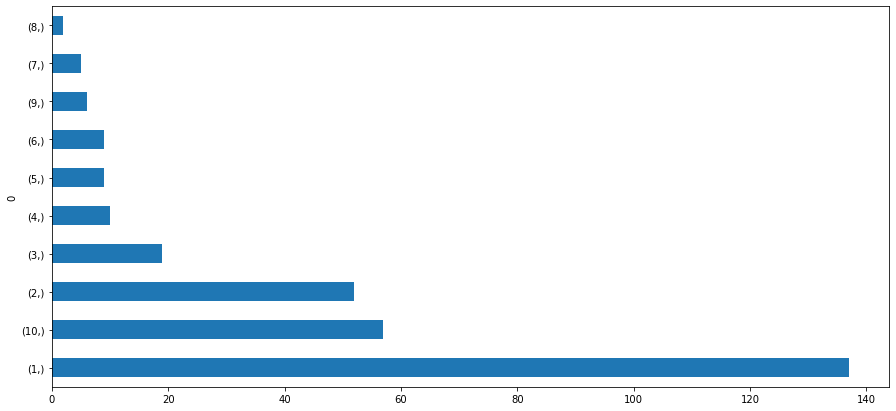

In [48]:
g_list = np.array([ele for ele in golden_list if (ele != 0)])

g_df = pd.DataFrame(g_list)
g_df.value_counts().plot(kind='barh', figsize=(15,7))

In [49]:
golden = []
for k in range (len(golden_list)):
    if (golden_list[k] != 0):
        golden.append([k, golden_list[k]])
        
pd.DataFrame(golden)

,0,1
0,22,1
1,23,1
2,24,1
3,25,1
4,26,1
...,...,...
301,4992,10
302,4993,10
303,4996,10
304,4997,9


In [50]:
np.save('golden5.npy', golden) 
!dir

 Volume in drive C has no label.
 Volume Serial Number is 2070-C46E

 Directory of C:\Users\2216027

28-03-2023  19:16    <DIR>          .
28-03-2023  19:16    <DIR>          ..
10-08-2022  10:20    <DIR>          .cisco
21-02-2023  10:38    <DIR>          .conda
28-11-2022  12:09                25 .condarc
25-11-2022  17:42    <DIR>          .continuum
28-03-2023  19:16    <DIR>          .ipynb_checkpoints
28-11-2022  13:15    <DIR>          .ipython
21-02-2023  14:20    <DIR>          .jupyter
01-12-2022  10:16    <DIR>          .matplotlib
24-09-2022  11:01    <DIR>          .ms-ad
01-03-2023  09:52    <DIR>          .spyder-py3
01-03-2023  16:52    <DIR>          .ssh
23-02-2023  12:27    <DIR>          .vscode
13-03-2023  12:24           870,904 20BCE1778_K_means_clustering.csv
09-08-2022  18:09    <DIR>          3D Objects
06-12-2022  12:45             4,213 Advertising.csv
13-12-2022  09:53           980,218 Ames_outliers_removed.csv
28-02-2023  10:35             3,141 chunks.ip